In [1]:
#데이터 리사이징 및 회전
import cv2
import os
import numpy as np
import nbimporter
import utils
%run ./utils.ipynb

original_hdata_dir = r'C:\Users\user\DL_Team_project\dataset\train\original\healthy'
original_ddata_dir = r'C:\Users\user\DL_Team_project\dataset\train\original\disease'

resized_hdata_dir = r'C:\Users\user\DL_Team_project\dataset\train\resized\re_healthy'
resized_ddata_dir = r'C:\Users\user\DL_Team_project\dataset\train\resized\re_disease'

rotated_hdata_dir = r'C:\Users\user\DL_Team_project\dataset\train\rotated\4ro_healthy'
rotated_ddata_dir = r'C:\Users\user\DL_Team_project\dataset\train\rotated\4ro_disease'

crop_hdata_dir = r'C:\Users\user\DL_Team_project\dataset\train\crop\6cr_healthy'
crop_ddata_dir = r'C:\Users\user\DL_Team_project\dataset\train\crop\6cr_disease'

h_buffer_dir = r'C:\Users\user\DL_Team_project\dataset\buffer\buff_h'
d_buffer_dir = r'C:\Users\user\DL_Team_project\dataset\buffer\buff_d'


noise_hdata_dir =r'C:\Users\user\DL_Team_project\dataset\train\noise\no_healthy'
noise_ddata_dir =r'C:\Users\user\DL_Team_project\dataset\train\noise\no_disease'

dtest_data = r'C:\Users\user\DL_Team_project\dataset\test\disease'
htest_data = r'C:\Users\user\DL_Team_project\dataset\test\healthy'

resized_dtest_data =r'C:\Users\user\DL_Team_project\dataset\test\disease'
resized_htest_data=r'C:\Users\user\DL_Team_project\dataset\test\healthy'


test1 = r'C:\Users\user\DL_Team_project\rotatesize'
test2 = r'C:\Users\user\DL_Team_project\cropsize'


#utils.makedir_resize(dtest_data, resized_dtest_data, (224,224))
#utils.makedir_resize(htest_data, resized_htest_data, (224,224))

#utils.makedir_rotate(resized_hdata_dir, test1, 6)
#utils.makedir_rotate(resized_ddata_dir, rotated_ddata_dir, 6)


#utils.makedir_crop(resized_hdata_dir, test2, (200,200))
#utils.makedir_crop(resized_ddata_dir, d_buffer_dir, (200,200))
#utils.makedir_rotate(h_buffer_dir, crop_hdata_dir, 6)
#utils.makedir_rotate(d_buffer_dir, crop_ddata_dir, 6)

#utils.add_noise(r'C:\Users\user\DL_Team_project\dataset\train\crop\rotate4\4cr_disease', noise_ddata_dir)
#utils.add_noise(r'C:\Users\user\DL_Team_project\dataset\train\crop\rotate4\4cr_healthy', noise_hdata_dir)



In [10]:
import os
from PIL import Image

def check_image_sizes(directory):
    """
    디렉터리 내 모든 이미지의 파일명과 크기를 출력하는 함수.
    
    Args:
        directory (str): 이미지 파일들이 있는 디렉터리 경로.
    """
    # 디렉터리가 유효한지 확인
    if not os.path.isdir(directory):
        print("유효하지 않은 디렉터리 경로입니다.")
        return

    # 디렉터리 내 파일들 확인
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        
        try:
            # 이미지 열기
            with Image.open(filepath) as img:
                width, height = img.size
                print(f"파일명: {filename}, 크기: {width}x{height}")
        except Exception as e:
            print(f"'{filename}' 파일을 처리할 수 없습니다. ({e})")

# 디렉터리 경로 설정
directory_path =r'C:\Users\user\DL_Team_project\dataset\train\cropNrotate\disease'  # 본인의 디렉터리 경로로 수정
check_image_sizes(directory_path)


파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-left.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-left_rotated_120.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-left_rotated_180.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-left_rotated_240.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-left_rotated_300.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-left_rotated_60.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-right.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-right_rotated_120.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-right_rotated_180.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-right_rotated_240.jpg, 크기: 200x200
파일명: 068e574167b0436942e6514736baf861_1481435331_47_bottom-right_rotated_300.jpg, 크기: 200x2

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import math



# 데이터 디렉토리 설정

base_dir = 'dataset'
train_dir = os.path.join(base_dir, r'C:\Users\user\DL_Team_project\dataset\train\crop\rotate6')
test_dir = os.path.join(base_dir, 'test')

results_dir = r'C:\Users\user\DL_Team_project\final_result'

#하이퍼파라미터 설정
IMAGE_SIZE = (200, 200)
BATCH_SIZE = [16]
EPOCHS = [50]
NEURONS = [#[16,16,16,64],
           #[16,16,32,64],
           #[32,32,32,128],
           [16,32,64,128],
           #[32,64,128,128],
           #[32,64,128,256],
           #[32,32,32,256]
          ]
DROPOUT = [0.2]



train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=16,
        class_mode='binary',  # 이진 분류를 위한 설정
        subset='training',
        shuffle=True
    )


validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=16,
        class_mode='binary',  # 이진 분류를 위한 설정
        subset='validation',
        shuffle=False
    )

import numpy as np

# 클래스별 이미지 개수 계산
train_classes = train_generator.classes
unique, counts = np.unique(train_classes, return_counts=True)

# 클래스 인덱스와 이름 매핑
class_indices = train_generator.class_indices
indices_to_class = {v: k for k, v in class_indices.items()}

print('Training data:')
for idx, count in zip(unique, counts):
    print(f"Class '{indices_to_class[idx]}': {count} images")

# 클래스 인덱스 확인
print('Class indices:', train_generator.class_indices)


utils.training_model(
        results_base_dir=results_dir,
        build_model_fn=build_model,
        train_dir=train_dir,
        IMAGE_SIZE=IMAGE_SIZE,
        BATCH_SIZE=BATCH_SIZE,
        EPOCHS=EPOCHS,
        DROPOUT=DROPOUT,
        NEURONS=NEURONS
    )


Found 6696 images belonging to 2 classes.
Found 744 images belonging to 2 classes.
Training data:
Class '6cr_disease': 2052 images
Class '6cr_healthy': 4644 images
Class indices: {'6cr_disease': 0, '6cr_healthy': 1}
총 1개의 하이퍼파라미터 조합을 학습합니다.

학습 시작 1/1: Batch Size=16, Epochs=50, Dropout=0.2, Neurons=[16, 32, 64, 128]
Found 6696 images belonging to 2 classes.
Found 744 images belonging to 2 classes.
Epoch 1/50
419/419 [==============================] - 42s 98ms/step - loss: 0.4063 - accuracy: 0.8112 - val_loss: 0.2241 - val_accuracy: 0.8508 - lr: 0.0010
Epoch 2/50
419/419 [==============================] - 41s 96ms/step - loss: 0.3107 - accuracy: 0.8651 - val_loss: 0.2427 - val_accuracy: 0.8992 - lr: 0.0010
Epoch 3/50
419/419 [==============================] - 40s 96ms/step - loss: 0.2835 - accuracy: 0.8835 - val_loss: 0.3332 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 4/50
419/419 [==============================] - 41s 97ms/step - loss: 0.2677 - accuracy: 0.8905 - val_loss: 0.2742 - val_a

Rank Model Directory                                   Accuracy  Loss      
1    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-32-64-128_dr0.20.9866    0.0390    
2    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-16-32-64_dr0.20.9758    0.0581    
3    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-16-16-64_dr0.20.9718    0.0612    
4    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-32-64-128_dr0.40.9691    0.0873    
5    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-16-32-64_dr0.50.9651    0.0650    
6    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-32-64-128_dr0.00.9610    0.0860    
7    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-16-32-64_dr0.40.9570    0.0753    
8    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons32-32-32-128_dr0.00.9570    0.0792    
9    C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-16-16-64_dr0.00.9556    0.10

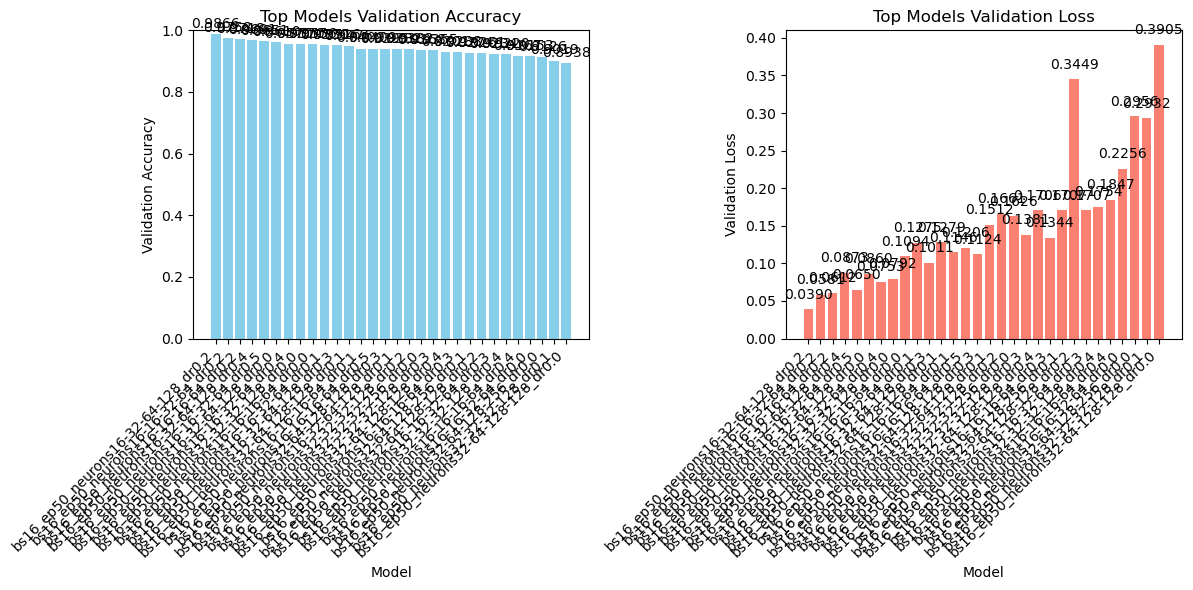


=== 상위 모델들의 구조 요약 ===

Rank 1: C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-32-64-128_dr0.2
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_56 (Bat  (None, 222, 222, 16)     64        
 chNormalization)                                                
                                                                 
 activation_56 (Activation)  (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 32)      4640      
        

In [6]:
sorted_by_accuracy = sortmodel(r'C:\Users\user\DL_Team_project\final_result', option=0)
show_good_model(sorted_by_accuracy, n=30)



In [21]:
#모델 분석
best_model_dir = sorted_by_accuracy[0]['model_dir']
print(best_model_dir)
save_evaluation_dir = 'test_10000'

test_evaluate(
    test_dir=r'C:\Users\user\DL_Team_project\dataset\test',
    model_dir=best_model_dir,
    save_dir=save_evaluation_dir,
    
    IMAGE_SIZE=(224,224),
    BATCH_SIZE=16  # 필요에 따라 조정
)

C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-32-64-128_dr0.2
모델 로드 완료: C:\Users\user\DL_Team_project\final_result\bs16_ep50_neurons16-32-64-128_dr0.2\model.h5
Found 77 images belonging to 2 classes.
Class indices: {'disease': 0, 'healthy': 1}
5/5 [==============================] - 0s 36ms/step - loss: 0.0634 - accuracy: 0.9870
테스트 손실: 0.06341675668954849
테스트 정확도: 0.9870129823684692
5/5 [==============================] - 0s 37ms/step
분류 보고서:
              precision    recall  f1-score   support

     disease       1.00      0.96      0.98        27
     healthy       0.98      1.00      0.99        50

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.99        77
weighted avg       0.99      0.99      0.99        77

분류 보고서 JSON 저장: test_10000\classification_report.json
혼동 행렬:
[[26  1]
 [ 0 50]]
혼동 행렬 이미지 저장: test_10000\confusion_matrix.png
ROC 곡선 이미지 저장: test_10000\roc_curve.png
평가 요약 저장: test_10000\evaluation_summary.json

In [ ]:
train_history(r'C:\Users\user\DL_Team_project\results\rotate6_crop200\bs16_ep150_neurons16-16-16-64_dr0.4')

In [3]:
# 결과 디렉터리 경로
results_base_dir = 'C:/Users/user/DL_Team_project/final_result'

# 테스트 데이터 디렉터리 경로
test_data_dir = 'C:/Users/user/DL_Team_project/dataset/test'

# 함수 호출
collect_and_evaluate_models(
    results_base_dir=results_base_dir,
    test_data_dir=test_data_dir,
    class_mode='binary',  # 이진 분류의 경우
    batch_size=16
)


모델 로드 완료: bs16_ep50_neurons16-16-16-64_dr0.0
모델의 입력 크기: (200, 200)
Found 77 images belonging to 2 classes.
모델: bs16_ep50_neurons16-16-16-64_dr0.0, 테스트 손실: 0.1456, 테스트 정확도: 0.9610
모델 로드 완료: bs16_ep50_neurons16-16-16-64_dr0.1
모델의 입력 크기: (200, 200)
Found 77 images belonging to 2 classes.
모델: bs16_ep50_neurons16-16-16-64_dr0.1, 테스트 손실: 0.1503, 테스트 정확도: 0.9481
모델 로드 완료: bs16_ep50_neurons16-16-16-64_dr0.2
모델의 입력 크기: (224, 224)
Found 77 images belonging to 2 classes.
모델: bs16_ep50_neurons16-16-16-64_dr0.2, 테스트 손실: 0.1026, 테스트 정확도: 0.9610
모델 로드 완료: bs16_ep50_neurons16-16-16-64_dr0.3
모델의 입력 크기: (224, 224)
Found 77 images belonging to 2 classes.
모델: bs16_ep50_neurons16-16-16-64_dr0.3, 테스트 손실: 0.0763, 테스트 정확도: 0.9610
모델 로드 완료: bs16_ep50_neurons16-16-16-64_dr0.4
모델의 입력 크기: (224, 224)
Found 77 images belonging to 2 classes.
모델: bs16_ep50_neurons16-16-16-64_dr0.4, 테스트 손실: 0.0763, 테스트 정확도: 0.9610
모델 로드 완료: bs16_ep50_neurons16-16-16-64_dr0.5
모델의 입력 크기: (224, 224)
Found 77 images belonging to 2 classes